In [1]:
%load_ext autoreload
%autoreload 2
import time
import torch
import cv2
import numpy as np
import copy
from matplotlib import pyplot as plt

from torch_openpose.body import Body
from torch_openpose import util


In [2]:


def read_imgfile(path, width=None, height=None, image_type=cv2.IMREAD_COLOR):
    val_image = cv2.imread(path, image_type)
    if width is not None and height is not None:
        val_image = cv2.resize(val_image, (width, height))
    return val_image

(-0.5, 391.5, 639.5, -0.5)

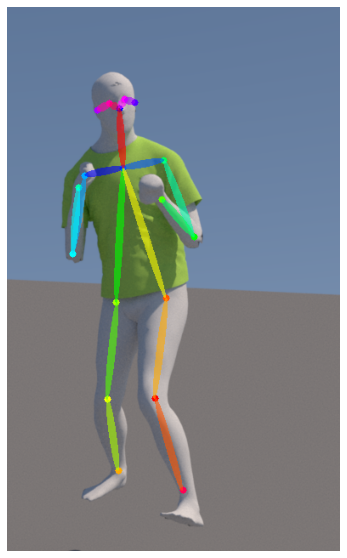

In [7]:
body_estimation = Body(
    '/home/ax/data/programs/pytorch-openpose/model/body_pose_model.pth', True)

#IMAGE_WIDTH, IMAGE_HEIGHT = 432, 368
#image_path_target = 'pose_scene/out_ref.png'
IMAGE_WIDTH, IMAGE_HEIGHT = 392, 640
image_path_target = '../data/radekData/000001.png'

image_target = read_imgfile(
    image_path_target, width=IMAGE_WIDTH, height=IMAGE_HEIGHT)

candidate, subset = body_estimation(image_target)
canvas = copy.deepcopy(image_target)
canvas = util.draw_bodypose(canvas, candidate, subset)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(canvas[:, :, [2, 1, 0]])
ax.axis('off')

cuda:0
(368, 432, 3)


(-0.5, 431.5, 367.5, -0.5)

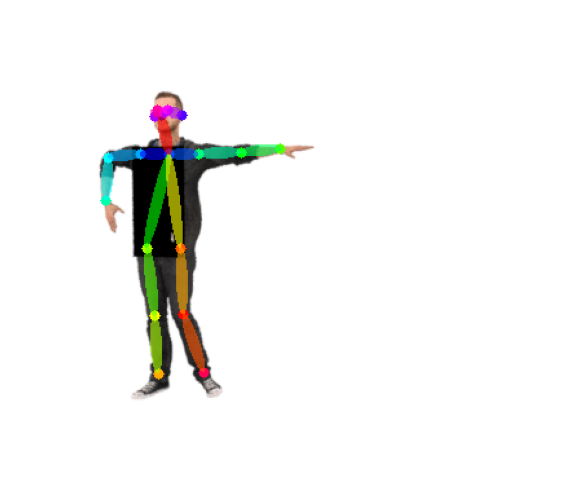

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
input_tensor = body_estimation.image_to_input_tensor(image_target, True).to(device)
heatmap_avg, paf_avg = body_estimation.compute_heatmap_paf_avg(input_tensor, image_target.shape)
candidate, subset = body_estimation.get_pose(heatmap_avg, paf_avg, image_target.shape)
canvas = copy.deepcopy(image_target)
canvas = util.draw_bodypose(canvas, candidate, subset)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(canvas[:, :, [2, 1, 0]])
ax.axis('off')

In [ ]:
input_tensor = body_estimation.image_to_input_tensor(image_target)

In [ ]:
print(input_tensor.shape)
print(torch.max(input_tensor))
print(torch.min(input_tensor))

In [12]:
def padRightDownCorner(img, stride, padValue):
    h = img.shape[0]
    w = img.shape[1]

    pad = 4 * [None]
    pad[0] = 0 # up
    pad[1] = 0 # left
    pad[2] = 0 if (h % stride == 0) else stride - (h % stride) # down
    pad[3] = 0 if (w % stride == 0) else stride - (w % stride) # right

    img_padded = img
    pad_up = np.tile(img_padded[0:1, :, :]*0 + padValue, (pad[0], 1, 1))
    img_padded = np.concatenate((pad_up, img_padded), axis=0)
    pad_left = np.tile(img_padded[:, 0:1, :]*0 + padValue, (1, pad[1], 1))
    img_padded = np.concatenate((pad_left, img_padded), axis=1)
    pad_down = np.tile(img_padded[-2:-1, :, :]*0 + padValue, (pad[2], 1, 1))
    img_padded = np.concatenate((img_padded, pad_down), axis=0)
    pad_right = np.tile(img_padded[:, -2:-1, :]*0 + padValue, (1, pad[3], 1))
    img_padded = np.concatenate((img_padded, pad_right), axis=1)

    return img_padded, pad

In [14]:
img_padded, pad = padRightDownCorner(image_target, 8, 128)

In [17]:
print(pad)
print(img_padded.shape)
print(np.linalg.norm(img_padded- image_target))

[0, 0, 0, 0]
(368, 432, 3)
0.0
